# Ercot Analysis: July - Present 

### Load in Data

In [19]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

# Set file path to Ercot Data
file_path = r"/Users/YoungFreeesh/Visual Studio Code/_Python/Web Scraping/Ercot/MASTER-Ercot.xlsx"

# read all data from "Master Data" tab from "MASTER-Ercot" 
dfMASTER = pd.read_excel(file_path, sheet_name = 'Master Data')

# Convert df to a Date Frame
dfMASTER = pd.DataFrame(dfMASTER) 

# Get Headers of "Master Data"
headers = list(dfMASTER.columns.values) 

# Get Unique Months by creating an Array of the active worksheet names
xls = xlrd.open_workbook(file_path, on_demand=True)
SheetNameArray = xls.sheet_names()
UniqueMonths = SheetNameArray[3:]

### Create DataFrames: July - Present

In [20]:
dfMASTER_SOUTH =  dfMASTER[['Oper Day', 'Interval Ending', 'HB_SOUTH', 'LZ_SOUTH']].copy(deep=True)
dfMASTER_SOUTH['Oper Day'] = pd.to_datetime(dfMASTER_SOUTH['Oper Day'])

# Sanity check data types
#dfMASTER_SOUTH.dtypes

# Reset index to Oper Day
dfMASTER_SOUTH = dfMASTER_SOUTH.set_index('Oper Day')

# Get Dates July - Present
dfMASTER_SOUTH_July_to_Present = dfMASTER_SOUTH.loc['2018-5-31 01:00:00':].copy(deep=True)

### Restore indices
QQ1 = dfMASTER_SOUTH_July_to_Present.index
dfMASTER_SOUTH_July_to_Present['Oper Day'] = QQ1
dfMASTER_SOUTH_July_to_Present = dfMASTER_SOUTH_July_to_Present.reset_index(drop=True)


dfMASTER_SOUTH_July_to_Present.head(10)


,Interval Ending,HB_SOUTH,LZ_SOUTH,Oper Day
0,15,18.93,19.15,2018-06-01
1,30,18.67,18.87,2018-06-01
2,45,18.49,18.71,2018-06-01
3,100,18.41,18.62,2018-06-01
4,115,18.32,18.54,2018-06-01
5,130,18.26,18.48,2018-06-01
6,145,18.08,18.30,2018-06-01
7,200,17.91,18.13,2018-06-01
8,215,17.79,18.01,2018-06-01
9,230,17.64,17.86,2018-06-01


### Create DataFrames: Add Weekend


In [21]:
dfMASTER_SOUTH_July_to_Present['day_of_week'] = dfMASTER_SOUTH_July_to_Present['Oper Day'].dt.dayofweek
dfMASTER_SOUTH_July_to_Present['weekday_name'] = dfMASTER_SOUTH_July_to_Present['Oper Day'].dt.weekday_name
dfMASTER_SOUTH_July_to_Present.head(10)


,Interval Ending,HB_SOUTH,LZ_SOUTH,Oper Day,day_of_week,weekday_name
0,15,18.93,19.15,2018-06-01,4,Friday
1,30,18.67,18.87,2018-06-01,4,Friday
2,45,18.49,18.71,2018-06-01,4,Friday
3,100,18.41,18.62,2018-06-01,4,Friday
4,115,18.32,18.54,2018-06-01,4,Friday
5,130,18.26,18.48,2018-06-01,4,Friday
6,145,18.08,18.30,2018-06-01,4,Friday
7,200,17.91,18.13,2018-06-01,4,Friday
8,215,17.79,18.01,2018-06-01,4,Friday
9,230,17.64,17.86,2018-06-01,4,Friday


## Outliers

### Calculate Outliers - 2.3 SD

In [22]:
### Outlier: Based on Percentile
outlierPercentile = .99 # Note: this is arbitrary and can be set to anything
# outlier_HB_SOUTH = dfMASTER['HB_SOUTH'].quantile(outlierPercentile)
# outlier_LZ_SOUTH = dfMASTER['LZ_SOUTH'].quantile(outlierPercentile)

### Outlier: Based on std
sdtMultiplier = 2.3
outlier_HB_SOUTH = dfMASTER_SOUTH['HB_SOUTH'].std() * sdtMultiplier
outlier_LZ_SOUTH = dfMASTER_SOUTH['LZ_SOUTH'].std() * sdtMultiplier

print("HB_SOUTH Outlier: ", int(outlier_HB_SOUTH), "($/MWh)") # rounded down
print("LZ_SOUTH Outlier: ", int(outlier_LZ_SOUTH), "($/MWh)") # ronded down

HB_SOUTH Outlier:  200 ($/MWh)
LZ_SOUTH Outlier:  245 ($/MWh)


### Create DataFrame: Outliers

In [23]:
### HB_SOUTH
dfMASTER_SOUTH_July_to_Present_Outliers_HB = dfMASTER_SOUTH_July_to_Present.copy(deep=True)
dfMASTER_SOUTH_July_to_Present_Outliers_HB = dfMASTER_SOUTH_July_to_Present_Outliers_HB[dfMASTER_SOUTH_July_to_Present_Outliers_HB['HB_SOUTH'] > outlier_HB_SOUTH ]             

### LZ_SOUTH
dfMASTER_SOUTH_July_to_Present_Outliers_LZ = dfMASTER_SOUTH_July_to_Present.copy(deep=True)
dfMASTER_SOUTH_July_to_Present_Outliers_LZ = dfMASTER_SOUTH_July_to_Present_Outliers_LZ[dfMASTER_SOUTH_July_to_Present_Outliers_LZ['LZ_SOUTH'] > outlier_LZ_SOUTH ]             

dfMASTER_SOUTH_July_to_Present_Outliers_LZ.head(10)


,Interval Ending,HB_SOUTH,LZ_SOUTH,Oper Day,day_of_week,weekday_name
439,1400,357.18,356.88,2018-06-05,1,Tuesday
442,1445,292.91,292.80,2018-06-05,1,Tuesday
443,1500,1268.26,1267.36,2018-06-05,1,Tuesday
444,1515,448.13,448.02,2018-06-05,1,Tuesday
445,1530,2135.10,2133.75,2018-06-05,1,Tuesday
446,1545,2319.88,2318.51,2018-06-05,1,Tuesday
447,1600,3115.47,3113.42,2018-06-05,1,Tuesday
448,1615,1400.03,1399.52,2018-06-05,1,Tuesday
449,1630,671.33,671.26,2018-06-05,1,Tuesday
450,1645,497.48,497.41,2018-06-05,1,Tuesday


### Summary of Data


##### Summary - All Days

In [24]:
dfMASTER_SOUTH.describe()

,Interval Ending,HB_SOUTH,LZ_SOUTH
count,20256.000000,20256.000000,20256.000000
mean,1197.500000,29.177147,33.811806
std,692.980248,86.974351,106.831880
min,15.000000,-86.690000,-23.730000
25%,611.250000,17.960000,18.230000
50%,1207.500000,19.880000,20.220000
75%,1803.750000,26.080000,27.202500
max,2400.000000,5772.880000,5512.210000


##### Summary: July - Present

In [25]:
dfMASTER_SOUTH_July_to_Present_Outliers_LZ.describe()

,Interval Ending,HB_SOUTH,LZ_SOUTH,day_of_week
count,67.000000,67.000000,67.000000,67.000000
mean,1615.970149,777.075970,776.387015,3.582090
std,113.728940,610.216992,609.978129,1.908111
min,1245.000000,245.910000,246.270000,1.000000
25%,1530.000000,321.330000,321.175000,2.000000
50%,1630.000000,514.340000,513.980000,3.000000
75%,1707.500000,1093.960000,1093.190000,5.000000
max,1915.000000,3115.470000,3113.420000,6.000000


##### Summary: Weekend Outliers July - Present 

In [26]:
dfMASTER_SOUTH_July_to_Present_Outliers_LZ.describe()

,Interval Ending,HB_SOUTH,LZ_SOUTH,day_of_week
count,67.000000,67.000000,67.000000,67.000000
mean,1615.970149,777.075970,776.387015,3.582090
std,113.728940,610.216992,609.978129,1.908111
min,1245.000000,245.910000,246.270000,1.000000
25%,1530.000000,321.330000,321.175000,2.000000
50%,1630.000000,514.340000,513.980000,3.000000
75%,1707.500000,1093.960000,1093.190000,5.000000
max,1915.000000,3115.470000,3113.420000,6.000000


# Plots

### All Data: 2018

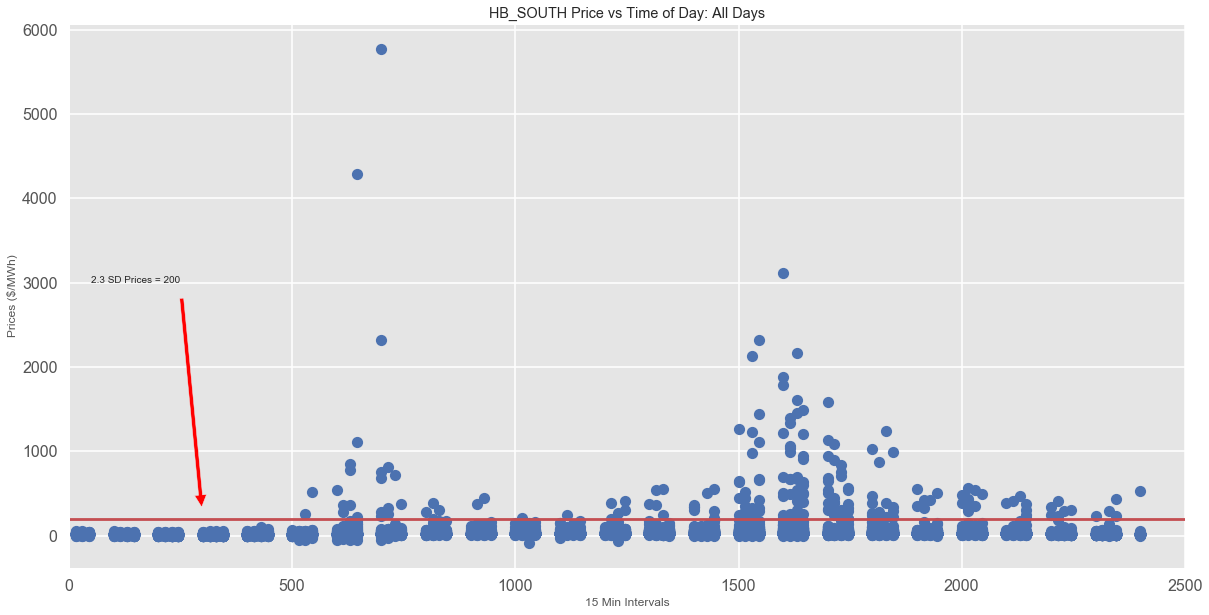

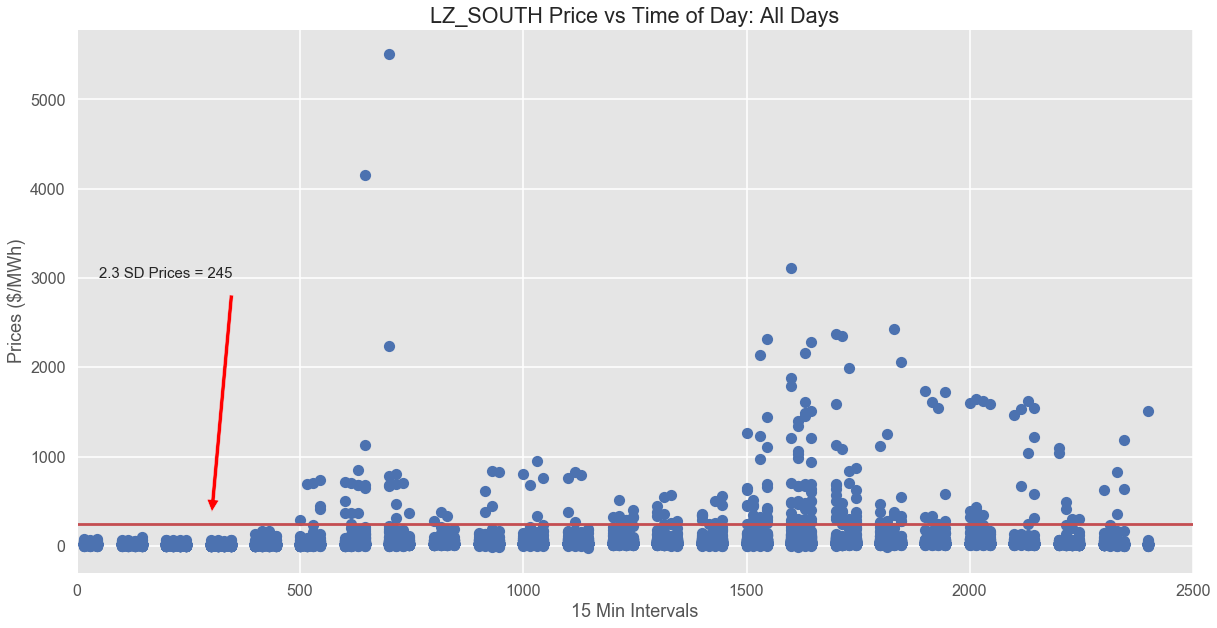

In [27]:
### HB_SOUTH Price vs Time of Day: All Days
plt.title('HB_SOUTH Price vs Time of Day: All Days')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_SOUTH['Interval Ending']
plt.plot(Xaxis,dfMASTER_SOUTH['HB_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_HB_SOUTH,outlier_HB_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
#subplot_1 = plt.figure().add_subplot(1, 1, 1)
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_HB_SOUTH))
#plt.text (700, 5000, printString, family='monospace', fontsize=11, color='red')
plt.annotate(printString, xy=(300, outlier_HB_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

################################################################################################

### LZ_SOUTH Price vs Time of Day: All Days
plt.title('LZ_SOUTH Price vs Time of Day: All Days')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_SOUTH['Interval Ending']
plt.plot(Xaxis,dfMASTER_SOUTH['LZ_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_LZ_SOUTH,outlier_LZ_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_LZ_SOUTH))
plt.annotate(printString, xy=(300, outlier_LZ_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

### 2018: July - Present

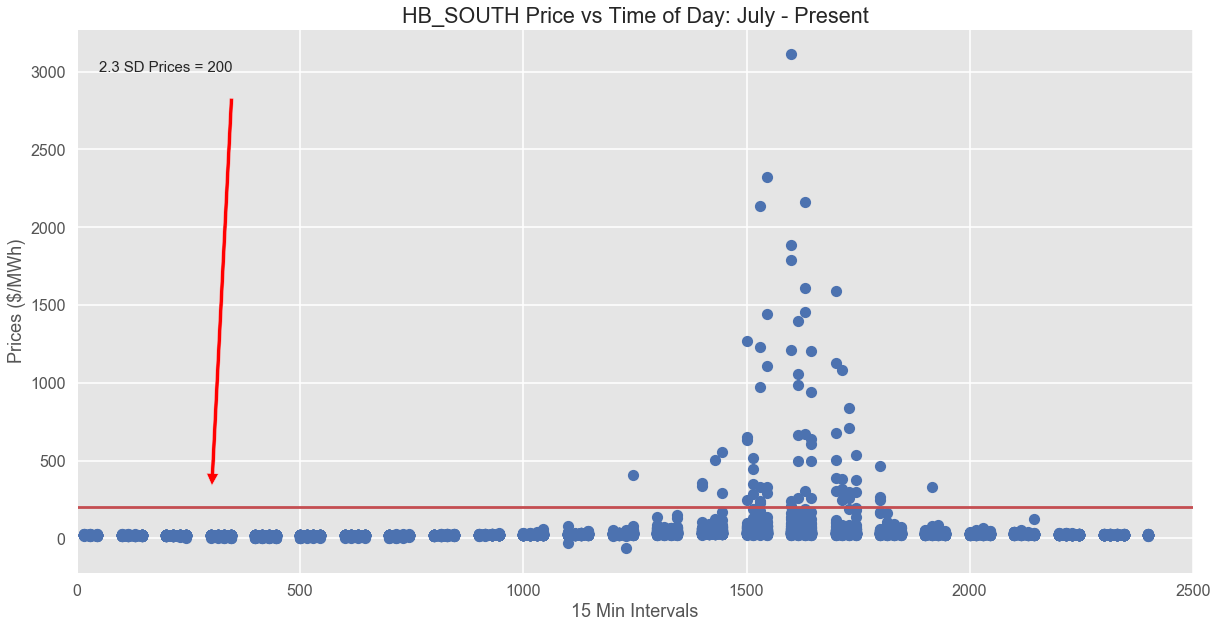

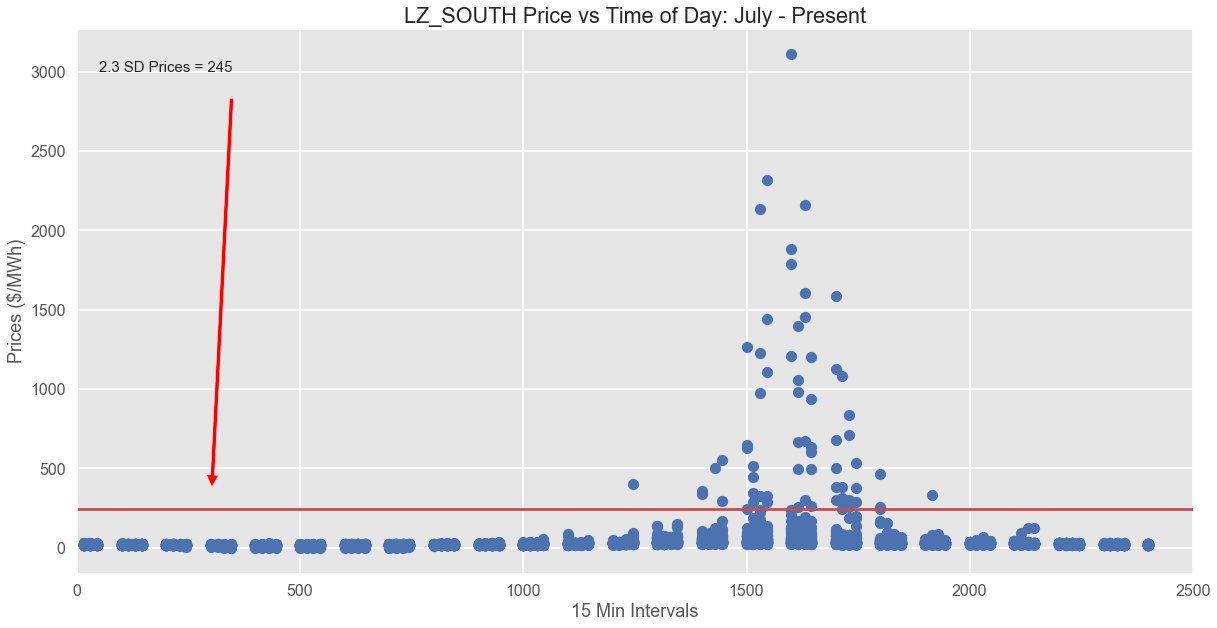

In [28]:
### HB_SOUTH Price vs Time of Day: All Days
plt.title('HB_SOUTH Price vs Time of Day: July - Present')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_SOUTH_July_to_Present['Interval Ending']
plt.plot(Xaxis,dfMASTER_SOUTH_July_to_Present['HB_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_HB_SOUTH,outlier_HB_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
#subplot_1 = plt.figure().add_subplot(1, 1, 1)
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_HB_SOUTH))
#plt.text (700, 5000, printString, family='monospace', fontsize=11, color='red')
plt.annotate(printString, xy=(300, outlier_HB_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

################################################################################################

### LZ_SOUTH Price vs Time of Day: All Days
plt.title('LZ_SOUTH Price vs Time of Day: July - Present')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_SOUTH_July_to_Present['Interval Ending']
plt.plot(Xaxis,dfMASTER_SOUTH_July_to_Present['LZ_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_LZ_SOUTH,outlier_LZ_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_LZ_SOUTH))
plt.annotate(printString, xy=(300, outlier_LZ_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

#### LZ_SOUTH

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

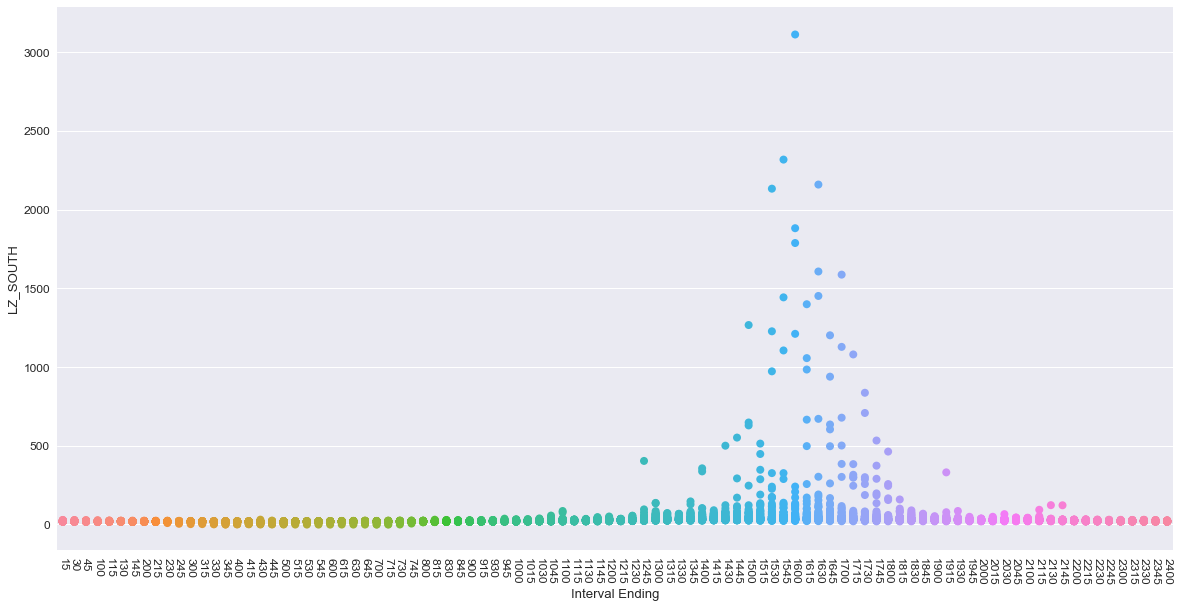

In [29]:
### All Days
import seaborn as sns; sns.set(color_codes=True)

sns.set_context("poster")
sns.set(font_scale = 1.2)
strip_plot = sns.stripplot(x='Interval Ending', y='LZ_SOUTH', data=dfMASTER_SOUTH_July_to_Present, size = 8 )
#box_plot = sns.boxplot(x='Interval Ending', y="LZ_SOUTH", data=dfMASTER_SOUTH_July_to_Present, palette=['#BBBBBB','#DDDDDD'],linewidth=1)
# strip_plot.set_xticklabels(rotation=30)
plt.xticks(rotation=270)

### Prices By Day of Week: July - Present

#### HB_SOUTH

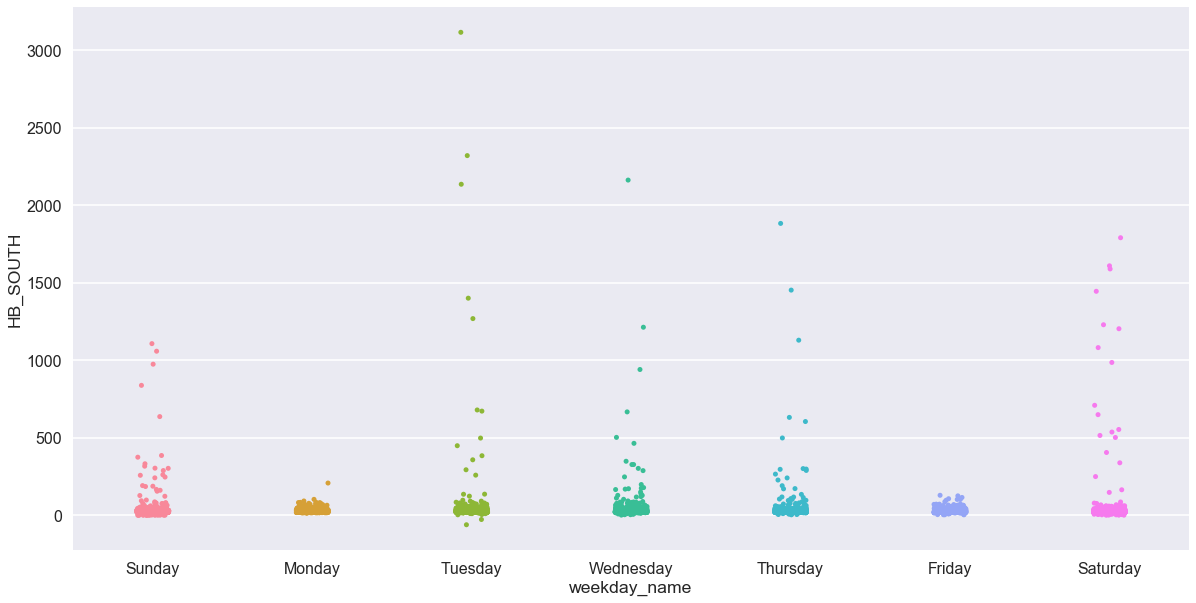

In [30]:
import seaborn as sns; sns.set(color_codes=True)

### HB_SOUTH
# Plot Order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg4 = sns.stripplot(x = "weekday_name", y = "HB_SOUTH", data = dfMASTER_SOUTH_July_to_Present, jitter = True, order = order, size = 5)
#p_box = sns.boxplot(x = "weekday_name", y = "HB_SOUTH", data = dfMASTER_SOUTH_July_to_Present, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)


#### LZ_SOUTH

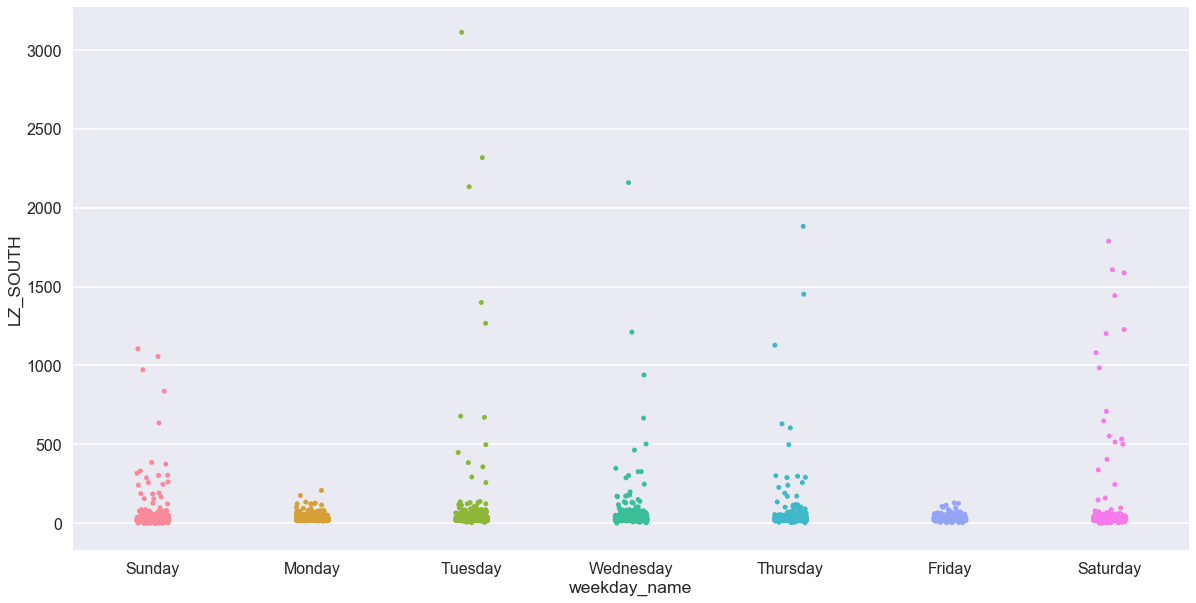

In [31]:
### LZ_SOUTH
# Plot order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg5 = sns.stripplot(x = "weekday_name", y = "LZ_SOUTH", data = dfMASTER_SOUTH_July_to_Present, jitter = True, order = order, size = 5)
#p_box = sns.boxplot(x = "weekday_name", y = "LZ_SOUTH", data = dfMASTER_SOUTH_July_to_Present, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)


### Outliers By Day of Week: July - Present

#### HB_SOUTH

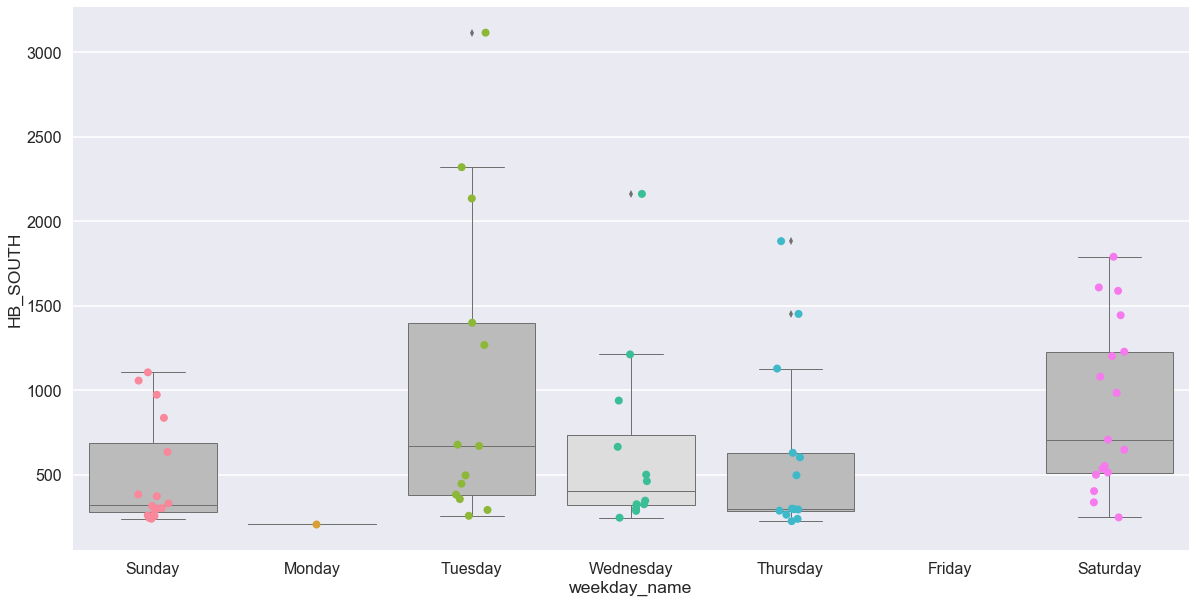

In [32]:
### LZ_SOUTH
# Plot order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg5 = sns.stripplot(x = "weekday_name", y = "HB_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_HB, jitter = True, order = order, size = 8)
p_box = sns.boxplot(x = "weekday_name", y = "HB_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_HB, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)


#### LZ_SOUTH

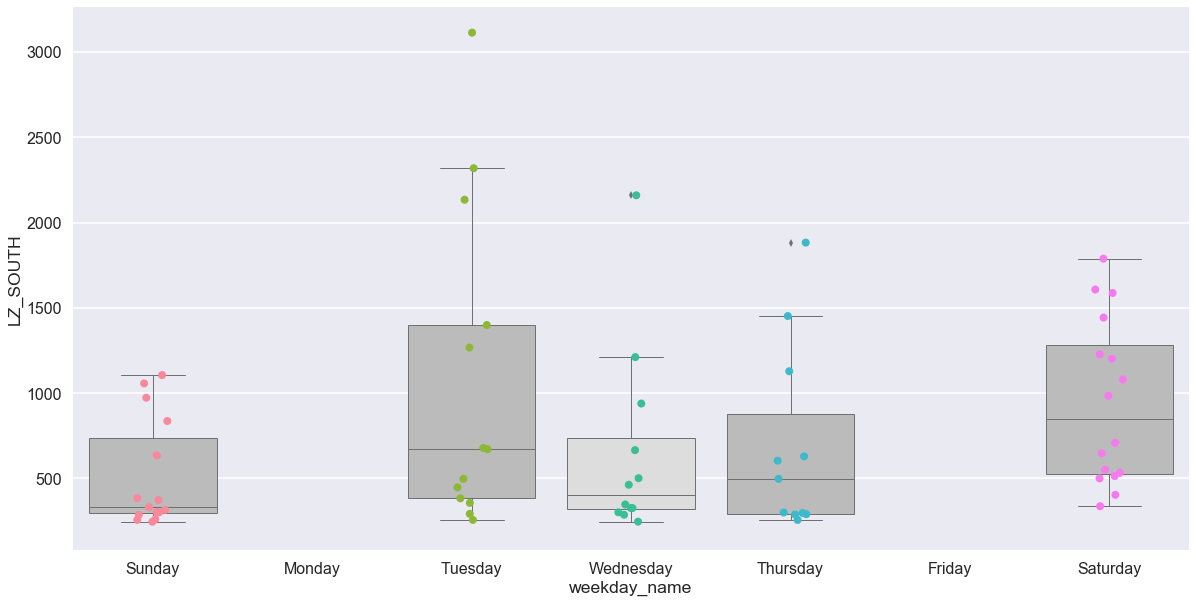

In [33]:
### LZ_SOUTH
# Plot order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg5 = sns.stripplot(x = "weekday_name", y = "LZ_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_LZ, jitter = True, order = order, size = 8)
p_box = sns.boxplot(x = "weekday_name", y = "LZ_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_LZ, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)


### Outliers by 15 min Period: July - Present

Note: Time Intervals with No Outliers are not shown

#### HB_SOUTH

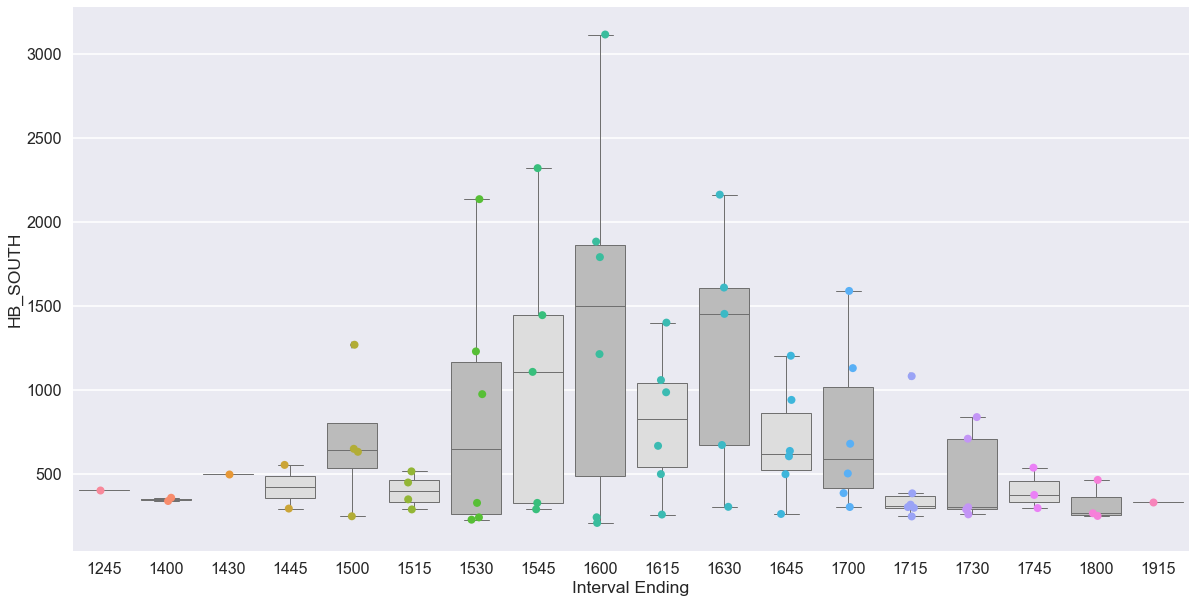

In [34]:
### HB_SOUTH
sns.set_context("poster")
strip_plot = sns.stripplot(x='Interval Ending', y='HB_SOUTH', data = dfMASTER_SOUTH_July_to_Present_Outliers_HB, jitter = True, size = 8 )
box_plot = sns.boxplot(x='Interval Ending', y = "HB_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_HB, palette=['#BBBBBB','#DDDDDD'],linewidth=1)


#### LZ_SOUTH

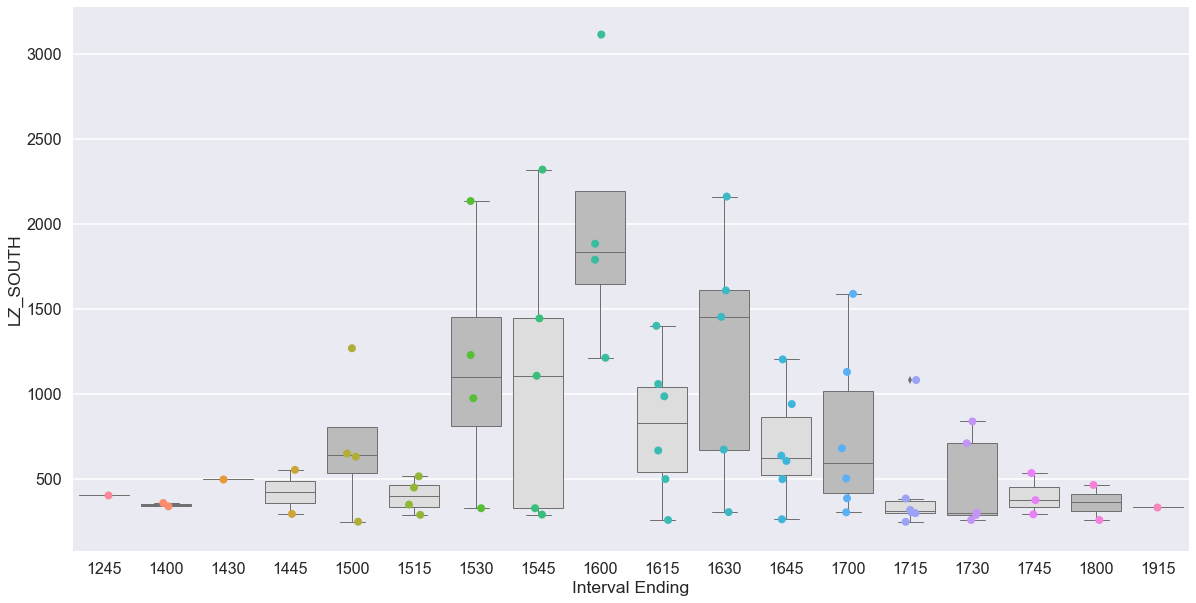

In [36]:
### LZ_SOUTH
sns.set_context("poster")
strip_plot = sns.stripplot(x='Interval Ending', y='LZ_SOUTH', data = dfMASTER_SOUTH_July_to_Present_Outliers_LZ, jitter = True, size = 8 )
box_plot = sns.boxplot(x='Interval Ending', y = "LZ_SOUTH", data = dfMASTER_SOUTH_July_to_Present_Outliers_LZ, palette=['#BBBBBB','#DDDDDD'],linewidth=1)
